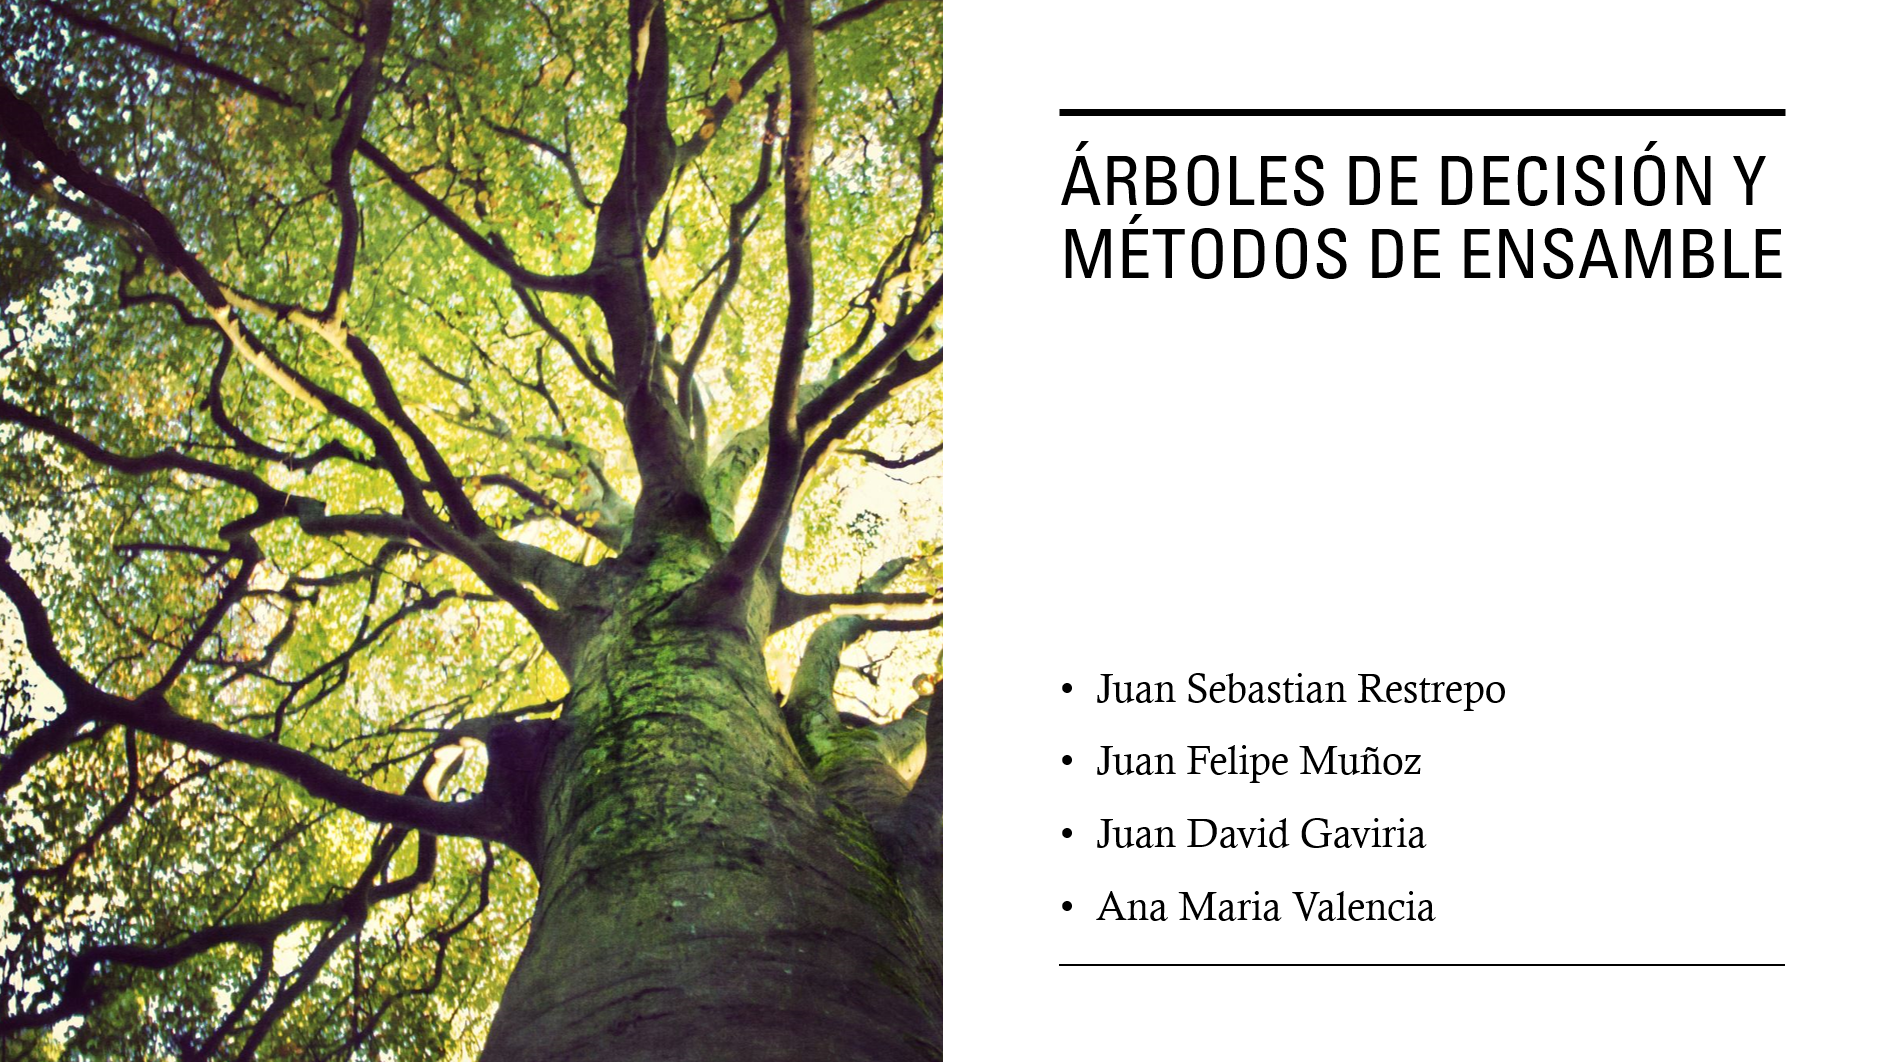

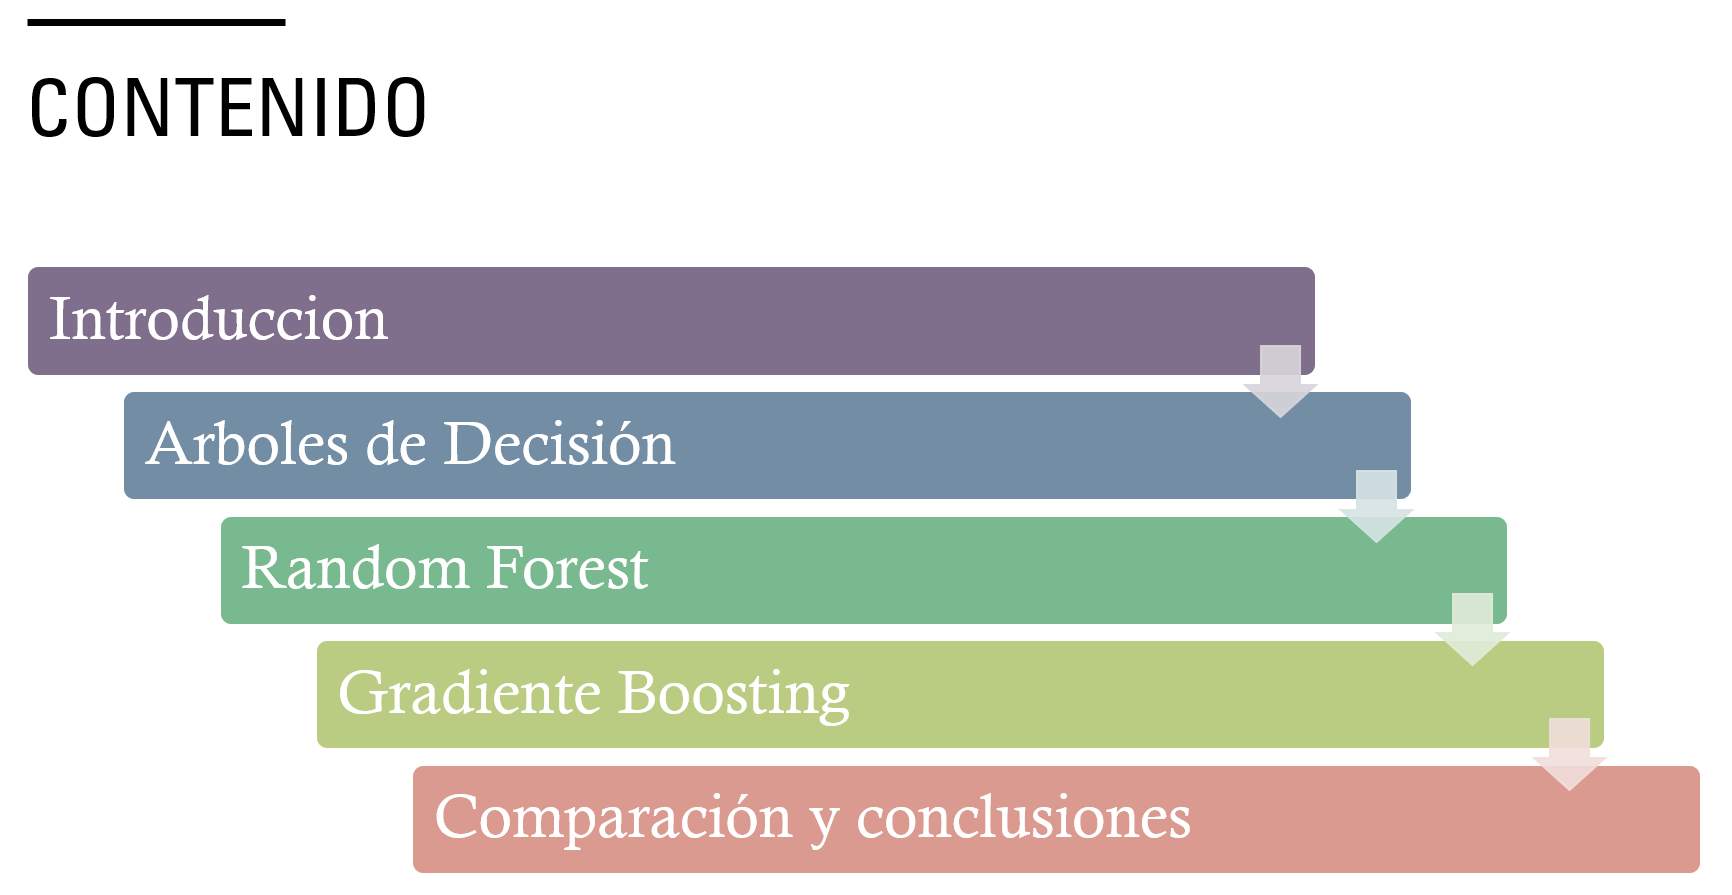

### Instalacion librerias
**Solo correr una vez si es local, si es en Colab siempre ejecuta**

In [3]:
# Solo correr una vez si es local, si es en Colab siempre ejecutar
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost jupyter

### Importar Librerias

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# 1. Carga y Preparación de Datos

## 1.1 Titanic Dataset

In [6]:

titanic = pd.read_csv('titanic.csv')

print(f"Titanic dataset shape: {titanic.shape}")
titanic.head()

Titanic dataset shape: (891, 12)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
# Preprocesamiento Titanic
def preprocess_titanic(df):
    df = df.copy()

    # Eliminar columnas no necesarias
    df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

    # Imputar valores faltantes
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

    # Codificar variables categóricas
    le = LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Embarked'] = le.fit_transform(df['Embarked'])

    return df

titanic_clean = preprocess_titanic(titanic)
print("Titanic dataset después del preprocesamiento:")
print(titanic_clean.info())

Titanic dataset después del preprocesamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB
None


In [8]:
# Preparar variables para Titanic
X_titanic = titanic_clean.drop('Survived', axis=1)
y_titanic = titanic_clean['Survived']

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_titanic, y_titanic, test_size=0.2, random_state=42, stratify=y_titanic
)

print(f"Titanic - Train shape: {X_train_t.shape}, Test shape: {X_test_t.shape}")

Titanic - Train shape: (712, 7), Test shape: (179, 7)


## 1.2 Bank Marketing Dataset

In [9]:
bank = pd.read_csv('bank.csv', sep=';')
print("Bank dataset cargado desde archivo local")

print(f"Bank Marketing dataset shape: {bank.shape}")
bank.head()

Bank dataset cargado desde archivo local
Bank Marketing dataset shape: (4521, 17)


age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [10]:
# Preprocesamiento Bank Marketing
def preprocess_bank(df):
    df = df.copy()

    # Codificar variable objetivo
    df['y'] = df['y'].map({'yes': 1, 'no': 0})

    # Codificar variables categóricas
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

    for col in categorical_cols:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))

    return df

bank_clean = preprocess_bank(bank)
print("Bank Marketing dataset después del preprocesamiento:")
print(bank_clean.info())

Bank Marketing dataset después del preprocesamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB
None


In [11]:
# Preparar variables para Bank Marketing
X_bank = bank_clean.drop('y', axis=1)
y_bank = bank_clean['y']

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_bank, y_bank, test_size=0.2, random_state=42, stratify=y_bank
)

print(f"Bank Marketing - Train shape: {X_train_b.shape}, Test shape: {X_test_b.shape}")

Bank Marketing - Train shape: (3616, 16), Test shape: (905, 16)


# 2. Árboles de Decisión

## 2.1 Implementación Básica

In [ ]:
# Árbol de decisión para Titanic
dt_titanic = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_titanic.fit(X_train_t, y_train_t)

y_pred_t = dt_titanic.predict(X_test_t)
accuracy_t = accuracy_score(y_test_t, y_pred_t)

print(f"Árbol de Decisión - Titanic - Accuracy: {accuracy_t:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_t, y_pred_t))



In [ ]:
# Árbol de decisión para Bank Marketing
dt_bank = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_bank.fit(X_train_b, y_train_b)

y_pred_b = dt_bank.predict(X_test_b)
accuracy_b = accuracy_score(y_test_b, y_pred_b)

print(f"Árbol de Decisión - Bank Marketing - Accuracy: {accuracy_b:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_b, y_pred_b))

## 2.2 Visualización de Árboles

In [ ]:
# Visualizar árbol de Titanic
plt.figure(figsize=(20, 10))
plot_tree(dt_titanic,
          feature_names=X_titanic.columns,
          class_names=['No Survived', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Árbol de Decisión - Titanic Dataset", fontsize=16)
plt.show()

In [ ]:
# Visualizar árbol de Bank Marketing (primeros niveles)
plt.figure(figsize=(15, 8))
plot_tree(dt_bank,
          feature_names=X_bank.columns,
          class_names=['No Subscription', 'Subscription'],
          filled=True,
          rounded=True,
          max_depth=2,  # Mostrar solo primeros 2 niveles por claridad
          fontsize=10)
plt.title("Árbol de Decisión - Bank Marketing Dataset (Primeros 2 niveles)", fontsize=16)
plt.show()

## 2.3 Comparación de Criterios de División

In [ ]:
# Comparar criterios Gini vs Entropía para Titanic
criterios = ['gini', 'entropy']
results_titanic = {}

for criterio in criterios:
    dt = DecisionTreeClassifier(criterion=criterio, random_state=42, max_depth=5)
    scores = cross_val_score(dt, X_titanic, y_titanic, cv=5, scoring='accuracy')
    results_titanic[criterio] = scores.mean()
    print(f"Titanic - {criterio}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

In [ ]:
# Comparar criterios Gini vs Entropía para Bank Marketing
results_bank = {}

for criterio in criterios:
    dt = DecisionTreeClassifier(criterion=criterio, random_state=42, max_depth=5)
    scores = cross_val_score(dt, X_bank, y_bank, cv=5, scoring='accuracy')
    results_bank[criterio] = scores.mean()
    print(f"Bank Marketing - {criterio}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

#3. Métodos de Ensamble

## 3.1 Random Forest - Bagging

In [ ]:
# Random Forest para Titanic
rf_titanic = RandomForestClassifier(n_estimators=100, random_state=42)
rf_titanic.fit(X_train_t, y_train_t)

y_pred_rf_t = rf_titanic.predict(X_test_t)
accuracy_rf_t = accuracy_score(y_test_t, y_pred_rf_t)

print(f"Random Forest - Titanic - Accuracy: {accuracy_rf_t:.4f}")
print("\nFeature Importances:")
feature_imp_t = pd.DataFrame({
    'feature': X_titanic.columns,
    'importance': rf_titanic.feature_importances_
}).sort_values('importance', ascending=False)
print(feature_imp_t)

In [ ]:
# Random Forest para Bank Marketing
rf_bank = RandomForestClassifier(n_estimators=100, random_state=42)
rf_bank.fit(X_train_b, y_train_b)

y_pred_rf_b = rf_bank.predict(X_test_b)
accuracy_rf_b = accuracy_score(y_test_b, y_pred_rf_b)

print(f"Random Forest - Bank Marketing - Accuracy: {accuracy_rf_b:.4f}")
print("\nFeature Importances:")
feature_imp_b = pd.DataFrame({
    'feature': X_bank.columns,
    'importance': rf_bank.feature_importances_
}).sort_values('importance', ascending=False)
print(feature_imp_b)

## 3.2 Boosting - Gradient Boosting

In [ ]:
# Gradient Boosting para Titanic
gb_titanic = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_titanic.fit(X_train_t, y_train_t)

y_pred_gb_t = gb_titanic.predict(X_test_t)
accuracy_gb_t = accuracy_score(y_test_t, y_pred_gb_t)

print(f"Gradient Boosting - Titanic - Accuracy: {accuracy_gb_t:.4f}")



In [ ]:
# Gradient Boosting para Bank Marketing
gb_bank = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_bank.fit(X_train_b, y_train_b)

y_pred_gb_b = gb_bank.predict(X_test_b)
accuracy_gb_b = accuracy_score(y_test_b, y_pred_gb_b)

print(f"Gradient Boosting - Bank Marketing - Accuracy: {accuracy_gb_b:.4f}")

## Opcional

### Boosting - AdaBoost

In [ ]:
# AdaBoost para Titanic
ada_titanic = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)
ada_titanic.fit(X_train_t, y_train_t)

y_pred_ada_t = ada_titanic.predict(X_test_t)
accuracy_ada_t = accuracy_score(y_test_t, y_pred_ada_t)

print(f"AdaBoost - Titanic - Accuracy: {accuracy_ada_t:.4f}")

In [ ]:
# AdaBoost para Bank Marketing
ada_bank = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)
ada_bank.fit(X_train_b, y_train_b)

y_pred_ada_b = ada_bank.predict(X_test_b)
accuracy_ada_b = accuracy_score(y_test_b, y_pred_ada_b)

print(f"AdaBoost - Bank Marketing - Accuracy: {accuracy_ada_b:.4f}")

###Boosting - XGBoost

In [ ]:
# XGBoost para Titanic
xgb_titanic = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_titanic.fit(X_train_t, y_train_t)

y_pred_xgb_t = xgb_titanic.predict(X_test_t)
accuracy_xgb_t = accuracy_score(y_test_t, y_pred_xgb_t)

print(f"XGBoost - Titanic - Accuracy: {accuracy_xgb_t:.4f}")

In [ ]:
# XGBoost para Bank Marketing
xgb_bank = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_bank.fit(X_train_b, y_train_b)

y_pred_xgb_b = xgb_bank.predict(X_test_b)
accuracy_xgb_b = accuracy_score(y_test_b, y_pred_xgb_b)

print(f"XGBoost - Bank Marketing - Accuracy: {accuracy_xgb_b:.4f}")

###Stacking Classifier

In [ ]:
# Stacking Classifier para Titanic
estimators_t = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
    ('xgb', xgb.XGBClassifier(n_estimators=50, random_state=42, use_label_encoder=False, eval_metric='logloss'))
]

stacking_t = StackingClassifier(
    estimators=estimators_t,
    final_estimator=LogisticRegression(),
    cv=5
)

stacking_t.fit(X_train_t, y_train_t)
y_pred_stack_t = stacking_t.predict(X_test_t)
accuracy_stack_t = accuracy_score(y_test_t, y_pred_stack_t)

print(f"Stacking Classifier - Titanic - Accuracy: {accuracy_stack_t:.4f}")

In [ ]:
# Stacking Classifier para Bank Marketing
estimators_b = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
    ('xgb', xgb.XGBClassifier(n_estimators=50, random_state=42, use_label_encoder=False, eval_metric='logloss'))
]

stacking_b = StackingClassifier(
    estimators=estimators_b,
    final_estimator=LogisticRegression(),
    cv=5
)

stacking_b.fit(X_train_b, y_train_b)
y_pred_stack_b = stacking_b.predict(X_test_b)
accuracy_stack_b = accuracy_score(y_test_b, y_pred_stack_b)

print(f"Stacking Classifier - Bank Marketing - Accuracy: {accuracy_stack_b:.4f}")

# 4. Comparación de Modelos

In [ ]:
# Resumen de resultados para Titanic
results_titanic_summary = {
    'Decision Tree': accuracy_t,
    'Random Forest': accuracy_rf_t,
    'Gradient Boosting': accuracy_gb_t,
    'AdaBoost': accuracy_ada_t,
    'XGBoost': accuracy_xgb_t,
    'Stacking': accuracy_stack_t
}

print("COMPARACIÓN DE MODELOS - TITANIC")
print("=" * 40)
for model, accuracy in results_titanic_summary.items():
    print(f"{model:20} | Accuracy: {accuracy:.4f}")

In [ ]:
# Resumen de resultados para Bank Marketing
results_bank_summary = {
    'Decision Tree': accuracy_b,
    'Random Forest': accuracy_rf_b,
    'Gradient Boosting': accuracy_gb_b,
    'AdaBoost': accuracy_ada_b,
    'XGBoost': accuracy_xgb_b,
    'Stacking': accuracy_stack_b
}

print("COMPARACIÓN DE MODELOS - BANK MARKETING")
print("=" * 45)
for model, accuracy in results_bank_summary.items():
    print(f"{model:20} | Accuracy: {accuracy:.4f}")

In [ ]:
# Visualización comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Titanic
models_t = list(results_titanic_summary.keys())
accuracies_t = list(results_titanic_summary.values())
bars1 = ax1.bar(models_t, accuracies_t, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'orange', 'pink'])
ax1.set_title('Comparación de Modelos - Titanic', fontsize=14, fontweight='bold')
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, 1)

# Añadir valores en las barras
for bar, acc in zip(bars1, accuracies_t):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc:.3f}', ha='center', va='bottom')

# Bank Marketing
models_b = list(results_bank_summary.keys())
accuracies_b = list(results_bank_summary.values())
bars2 = ax2.bar(models_b, accuracies_b, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'orange', 'pink'])
ax2.set_title('Comparación de Modelos - Bank Marketing', fontsize=14, fontweight='bold')
ax2.set_ylabel('Accuracy')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0, 1)

# Añadir valores en las barras
for bar, acc in zip(bars2, accuracies_b):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 5. Optimización de Hiperparámetros

## 5.1 Optimización para Random Forest

In [ ]:
# Optimización de Random Forest para Titanic
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}

rf_opt = RandomForestClassifier(random_state=42)
grid_search_t = GridSearchCV(rf_opt, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_t.fit(X_train_t, y_train_t)

print("Mejores parámetros para Titanic:")
print(grid_search_t.best_params_)
print(f"Mejor score: {grid_search_t.best_score_:.4f}")


In [ ]:
# Optimización de Random Forest para Bank Marketing
grid_search_b = GridSearchCV(rf_opt, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_b.fit(X_train_b, y_train_b)

print("Mejores parámetros para Bank Marketing:")
print(grid_search_b.best_params_)
print(f"Mejor score: {grid_search_b.best_score_:.4f}")

# 6. Análisis de Importancia de Variables

In [ ]:
# Importancia de variables para Titanic (usando el mejor modelo)
best_rf_t = grid_search_t.best_estimator_
feature_importance_t = pd.DataFrame({
    'feature': X_titanic.columns,
    'importance': best_rf_t.feature_importances_
}).sort_values('importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_t['feature'], feature_importance_t['importance'])
plt.title('Importancia de Variables - Titanic (Random Forest Optimizado)', fontsize=14)
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

In [ ]:
# Importancia de variables para Bank Marketing (usando el mejor modelo)
best_rf_b = grid_search_b.best_estimator_
feature_importance_b = pd.DataFrame({
    'feature': X_bank.columns,
    'importance': best_rf_b.feature_importances_
}).sort_values('importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_b['feature'], feature_importance_b['importance'])
plt.title('Importancia de Variables - Bank Marketing (Random Forest Optimizado)', fontsize=14)
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

# 7. Conclusiones

In [ ]:
# Resumen final
print("CONCLUSIONES FINALES")
print("=" * 50)
print("\nTITANIC DATASET:")
print(f"- Mejor modelo: {max(results_titanic_summary, key=results_titanic_summary.get)}")
print(f"- Mejor accuracy: {max(results_titanic_summary.values()):.4f}")
print(f"- Variables más importantes: {list(feature_importance_t.tail(3)['feature'])}")

print("\nBANK MARKETING DATASET:")
print(f"- Mejor modelo: {max(results_bank_summary, key=results_bank_summary.get)}")
print(f"- Mejor accuracy: {max(results_bank_summary.values()):.4f}")
print(f"- Variables más importantes: {list(feature_importance_b.tail(3)['feature'])}")

print("\nOBSERVACIONES GENERALES:")
print("- Los métodos de ensamble generalmente superan a los árboles individuales")
print("- Random Forest y XGBoost suelen ser los métodos más robustos")
print("- La optimización de hiperparámetros puede mejorar significativamente el rendimiento")
print("- La importancia de variables varía según el dataset y el problema específico")